<a href="https://colab.research.google.com/github/MounikaGowrasani/TSF_TASK_1_Gowrasani_Mounika/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science and Business Analytics intern at Sparks Foundation

**TASK-1 Prediction using Supervised ML**

Perform exploratory Data Analysis on dataset 'Student' To Predict the percentage of marks of the students based on the number of hours they studied.

Sample Dataset: http://bit.ly/w-data

In [ ]:
#import the libraries required for supervised learning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#read the data from  given sample dataset
data = pd.read_csv('http://bit.ly/w-data')
#view the top 10 rows of the data
data.head(10)

In [ ]:
#handle missing values
data.isnull().sum()


Hours     0
Scores    0
dtype: int64

No Null values present to handle them.

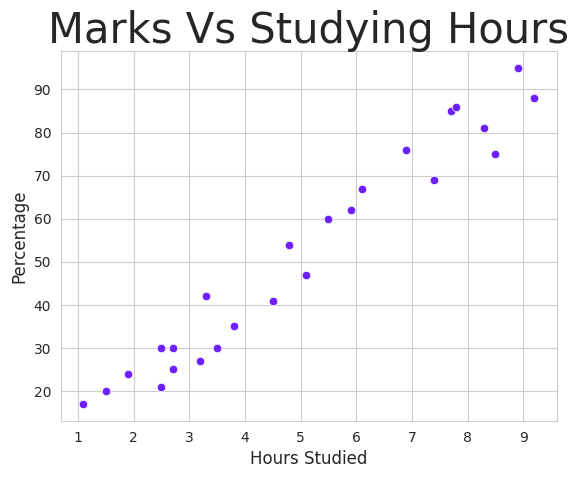

In [ ]:
#represent the data as scatter plot
import matplotlib.cm as cm
sns.set_style('whitegrid')
colors = iter(cm.rainbow(np.linspace(0, 1, len(data))))
for i in data:
  sns.scatterplot(y= data['Scores'], x= data['Hours'],color=next(colors))
plt.title('Marks Vs Studying Hours',size=30)
plt.ylabel('Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

Applying Linear Regression as marks Percentage and Hours are correlated

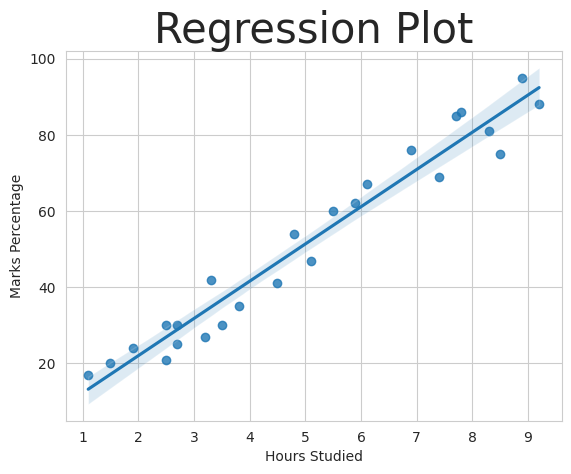

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=30)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()
print(data.corr())

Marks Percentage and hours are positively correlated

**Model Evaluation - Training and testing**

Splitting the data

In [ ]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

# Spliting the Data in two training and testing
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

Fit data into model

In [ ]:
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression()

Predicting the percentage

In [ ]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction


,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


Comparing the predicted and actual marks

In [ ]:
cscores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
cscores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Visualising the comparision

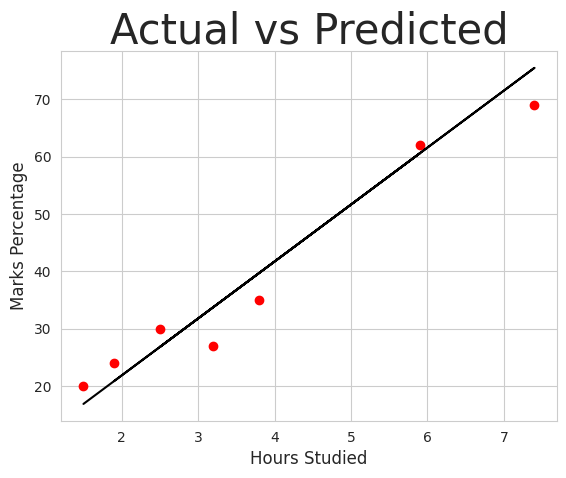

In [ ]:
plt.scatter(x=val_X, y=val_y, color='red')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=30)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

Evaluate the model

In [ ]:

#evaluating using metrics
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

**What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [ ]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


**Conclusion : Supervised Learning : regression model states that if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**